In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/GrammarandProductReviews.csv')
df.head(5)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [3]:
df = df[['reviews.rating', 'reviews.text', 'reviews.title']]
df.head()

,reviews.rating,reviews.text,reviews.title
0,5,i love this album. it's very good. more to the...,Just Awesome
1,5,Good flavor. This review was collected as part...,Good
2,5,Good flavor.,Good
3,1,I read through the reviews on here before look...,Disappointed
4,1,My husband bought this gel for us. The gel cau...,Irritation


In [4]:
# Find size of smallest category of samples
type_categories = (set(df['reviews.rating'].values))
print("Type of categories: ", type_categories)

len_small = sys.maxsize
for i in type_categories:
    number_samples = (df[df['reviews.rating'] == i])
    if len_small > len(number_samples):
        len_small = len(number_samples)

print("Size of smallest category:", len_small)

Type of categories:  {1, 2, 3, 4, 5}
Size of smallest category: 1833


In [5]:
# Train, Test, Validation
import math
train = math.floor(0.8 * len_small)
test = math.floor(0.1 * len_small)
val = math.floor(0.1 * len_small)
print("Train: {}; Test: {}; Validation: {}".format(train,test,val))

Train: 1466; Test: 183; Validation: 183


In [6]:
# Building the dataset of `len_small` entries
df_categories = [df[df['reviews.rating'] == i][0:len_small] for i in type_categories]
new_df = pd.concat(df_categories, ignore_index=True)
new_df.describe()

,reviews.rating
count,9165.000000
mean,3.000000
std,1.414291
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [7]:
# Delete all other dataframes and set df to the dataset we processed
df = new_df
del new_df
del df_categories

In [8]:
# Randomize the dataframe
df = df.sample(frac=1.0)

In [9]:
# Fixing NaN values
nan_entries = df['reviews.text'].isnull() == True
df.drop(df[nan_entries].index, inplace=True)
len(df)

9162

In [10]:
X = df['reviews.text'].values
Y = df['reviews.rating'].values

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/home/kirito/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# Convert text to label encoding
# 1. tokenize
tokenizer = Tokenizer(num_words=2000, oov_token='UNKNOWN_TOKEN')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [15]:
# Find length of sequences as histogram distribution
len_of_sequences = []
for seq in X:
    len_of_sequences.append(len(seq))

'Most of the sequences are in the range of 0 to 90'

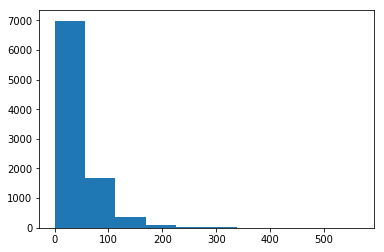

In [17]:
plt.hist(len_of_sequences)
'''Most of the sequences are in the range of 0 to 90'''

In [18]:
X = pad_sequences(X, maxlen=180)

In [19]:
print(X.shape)
print(Y.shape)

(9162, 180)
(9162,)


### Building the model 

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import to_categorical